In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline

import matplotlib.pyplot as plt


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,GlobalAveragePooling2D

In [4]:
train_dir=r'C:\Users\sande\Downloads\cats_and_dogs_small\train'
validation_dir=r'C:\Users\sande\Downloads\cats_and_dogs_small\validation'
test_dir=r'C:\Users\sande\Downloads\cats_and_dogs_small\test'

In [10]:
train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [11]:
model=Sequential([
        Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu',input_shape=(150, 150, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu',input_shape=(150, 150, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu',input_shape=(150, 150, 3)),
        MaxPooling2D((2, 2)),
        
        Flatten(),
        Dropout(0.3),
        Dense(512,activation='relu'),
        Dense(1,activation='sigmoid')
        
        
])

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [16]:
#steps_per_epoch = No of images/ batch_size
#->2000/20 = 100

from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])


history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/10
100/100 [==============================] - 110s 1s/step - loss: 0.6428 - acc: 0.6195 - val_loss: 0.6624 - val_acc: 0.5940
Epoch 2/10
100/100 [==============================] - 112s 1s/step - loss: 0.5883 - acc: 0.6820 - val_loss: 0.6033 - val_acc: 0.6800
Epoch 3/10
100/100 [==============================] - 112s 1s/step - loss: 0.5566 - acc: 0.7120 - val_loss: 0.6119 - val_acc: 0.6520
Epoch 4/10
100/100 [==============================] - 111s 1s/step - loss: 0.5313 - acc: 0.7235 - val_loss: 0.6386 - val_acc: 0.6430
Epoch 5/10
100/100 [==============================] - 111s 1s/step - loss: 0.5125 - acc: 0.7410 - val_loss: 0.5808 - val_acc: 0.6820
Epoch 6/10
100/100 [==============================] - 111s 1s/step - loss: 0.4873 - acc: 0.7575 - val_loss: 0.5911 - val_acc: 0.6830
Epoch 7/10
100/100 [==============================] - 111s 1s/step - loss: 0.4536 - acc: 0.7905 - val_loss: 0.6391 - val_acc: 0.6690
Epoch 8/10
100/100 [==============================] - 111s 1s/step - 

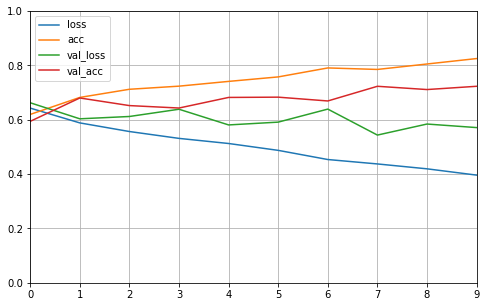

In [17]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [18]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 939 images belonging to 2 classes.


In [19]:
model.evaluate_generator(test_generator, steps=50)

[0.5565539795160294, 0.7447447]